<a href="https://colab.research.google.com/github/naveennekkanti1/PLANT-DISEASES-CLASSIFICATION-USING-ALEXNET/blob/main/SC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json


{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:17<00:00, 217MB/s]
100% 2.70G/2.70G [00:17<00:00, 162MB/s]


In [ ]:
!kaggle datasets download -d boulaalamcfk/modelalexnet-and-best-weights-9

Dataset URL: https://www.kaggle.com/datasets/boulaalamcfk/modelalexnet-and-best-weights-9
License(s): unknown
 96% 203M/212M [00:02<00:00, 115MB/s]
100% 212M/212M [00:02<00:00, 104MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import zipfile
import os

# Define the zip file path and extraction directory
zip_path = "/content/new-plant-diseases-dataset.zip"
extract_path = "/content/"  # Destination folder for extracted files

# Check if the zip file exists
if os.path.exists(zip_path):
    # Unzip the file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction completed.")

    # List contents of the extracted folder to confirm
    extracted_files = os.listdir(extract_path)
    print("Extracted files:", extracted_files)
else:
    print(f"File not found: {zip_path}")


Extraction completed.
Extracted files: ['.config', 'New Plant Diseases Dataset(Augmented)', 'kaggle.json', 'new plant diseases dataset(augmented)', 'modelalexnet-and-best-weights-9.zip', 'new-plant-diseases-dataset.zip', 'test', 'sample_data']


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/modelalexnet-and-best-weights-9.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
classifier.load_weights('/content/best_weights_9.hdf5')

In [ ]:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6
20 dense_2
21 dropout_2
22 batch_normalization_7
23 dense_3


In [ ]:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6


In [ ]:
from tensorflow.keras import optimizers

# Define optimizer
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.005)

# Compile the model
classifier.compile(optimizer=optimizer,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
base_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=False)

valid_set = valid_datagen.flow_from_directory(base_dir+'/valid',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training started...
Epoch [1/10], Loss: 3.6390
Epoch [2/10], Loss: 3.6371
Epoch [3/10], Loss: 3.6370
Epoch [4/10], Loss: 3.6368
Epoch [5/10], Loss: 3.6369
Epoch [6/10], Loss: 3.6369
Epoch [7/10], Loss: 3.6368
Epoch [8/10], Loss: 3.6367
Epoch [9/10], Loss: 3.6369
Epoch [10/10], Loss: 3.6368
Training completed.



Fuzzy Logic Results:
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low
Class: Apple___healthy, Confidence: 0.03, Membership: Low


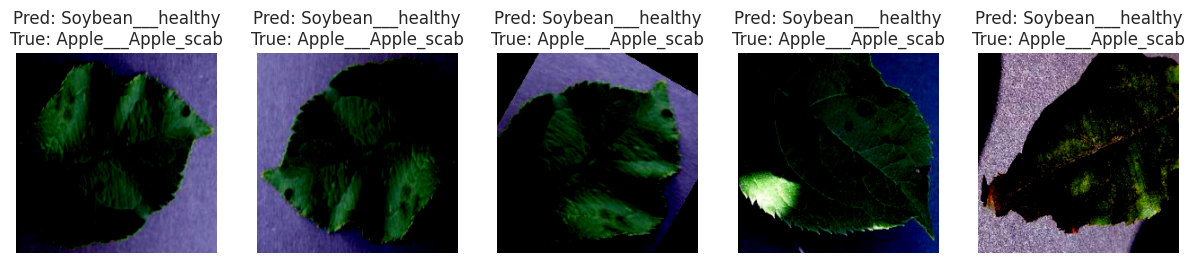

In [ ]:
import os
import torch0
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths for dataset
train_dir = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"
val_dir = "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# 1. Data Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
val_data = datasets.ImageFolder(root=val_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# 2. Load and Modify AlexNet
alexnet = models.alexnet(pretrained=True)
num_classes = len(train_data.classes)
alexnet.classifier[6] = nn.Linear(4096, num_classes)
alexnet = alexnet.to(device)

# 3. Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=learning_rate)

# 4. Training Loop
print("Training started...")
for epoch in range(num_epochs):
    alexnet.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = alexnet(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

print("Training completed.")

# 6. Fuzzy Logic for Confidence Levels
def fuzzy_membership(prob):
    if prob > 0.8:
        return "High"
    elif 0.5 <= prob <= 0.8:
        return "Medium"
    else:
        return "Low"

# Example: Run fuzzy logic on a batch of predictions
def apply_fuzzy_logic(model, data_loader):
    model.eval()
    results = []
    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            outputs = torch.softmax(model(images), dim=1)
            for i, output in enumerate(outputs):
                prob, class_idx = torch.max(output, 0)
                membership = fuzzy_membership(prob.item())
                results.append((train_data.classes[class_idx], prob.item(), membership))
    return results

fuzzy_results = apply_fuzzy_logic(alexnet, val_loader)
print("\nFuzzy Logic Results:")
for res in fuzzy_results[:10]:  # Display first 10 results
    print(f"Class: {res[0]}, Confidence: {res[1]:.2f}, Membership: {res[2]}")

# 7. Visualize Results
def visualize_sample_predictions(data_loader, predictions):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].permute(1, 2, 0).numpy())
        ax.set_title(f"Pred: {train_data.classes[predictions[i]]}\nTrue: {train_data.classes[labels[i]]}")
        ax.axis('off')
    plt.show()

visualize_sample_predictions(val_loader, val_preds)


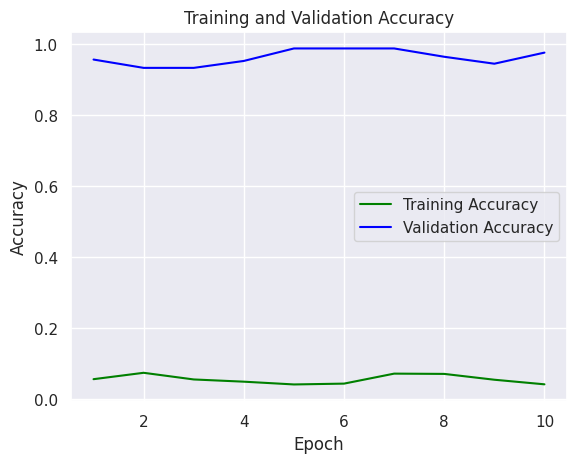

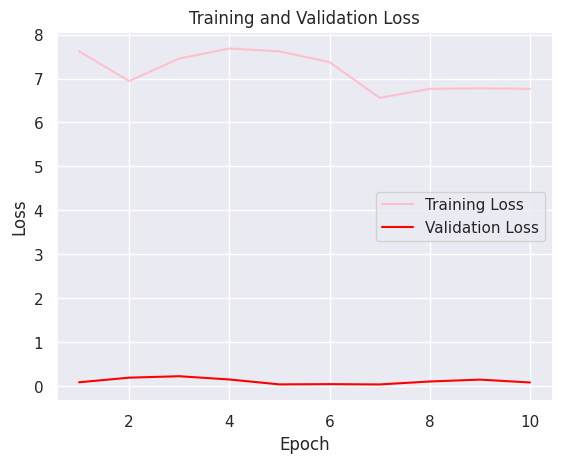

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


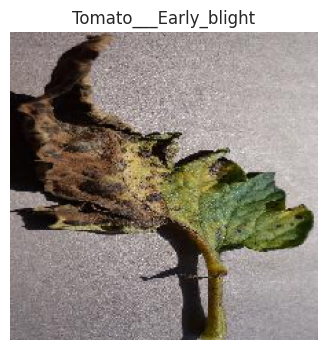

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
image_path = "/content/test/test/TomatoEarlyBlight1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]


plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.4 MB/s eta 0:00:00
